# Name : Gobinath Periyasamy
# Roll No : CS21M501

## iv. Code the gradient descent algorithm for ridge regression. Cross-validate for various choices of λ and plot the error in the validation set as a function of λ. For the best λ chosen, obtain wR. Compare the test error (for the test data in the file A2Q2Data test.csv) of wR with wML. Which is better and why?

## Code the gradient descent algorithm for Ridge Regression.

In [15]:
# import libraries

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import cluster,datasets, mixture
from sklearn.model_selection import train_test_split
from scipy.stats import multivariate_normal
from numpy import linalg as LA

In [16]:
# import Excel A2Q1 data:
df_train = pd.read_csv("A2Q2Data_train.csv",header = None)
df_train

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,0.58351,0.379390,0.839750,0.086861,0.611920,0.39203,0.189640,0.585090,0.89494,0.393850,...,0.51706,0.20535,0.829990,0.24995,0.319800,0.19674,0.958550,0.849480,0.923690,1.9741
1,0.86622,0.451350,0.934790,0.235810,0.504880,0.49742,0.117220,0.574880,0.71051,0.336890,...,0.27412,0.46065,0.655440,0.56656,0.490620,0.19920,0.320680,0.414190,0.830230,2.3354
2,0.39142,0.919950,0.138730,0.991810,0.543670,0.98449,0.340260,0.206470,0.40131,0.128990,...,0.27247,0.38911,0.799490,0.57753,0.866820,0.69741,0.628630,0.294790,0.542800,2.2053
3,0.79553,0.278540,0.228900,0.789290,0.492220,0.67084,0.769410,0.057104,0.20393,0.086936,...,0.24901,0.65976,0.943350,0.41246,0.927150,0.11015,0.101310,0.668010,0.345730,2.0400
4,0.65223,0.966650,0.179850,0.354060,0.840420,0.92891,0.014597,0.229530,0.43920,0.548940,...,0.93277,0.23674,0.027077,0.27111,0.233660,0.56356,0.047289,0.627920,0.979300,2.2053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.13627,0.056966,0.229530,0.343080,0.019914,0.29071,0.124340,0.523650,0.80031,0.120490,...,0.23140,0.75825,0.418120,0.33551,0.361130,0.12088,0.050074,0.335240,0.040619,3.0543
9996,0.95662,0.141930,0.978510,0.782700,0.198780,0.29844,0.331600,0.302100,0.68403,0.827360,...,0.47084,0.71044,0.323540,0.65593,0.043369,0.69314,0.672490,0.573740,0.110510,2.3255
9997,0.89209,0.997530,0.880430,0.813160,0.294460,0.40088,0.198950,0.402530,0.98442,0.746290,...,0.64760,0.86836,0.227950,0.92668,0.735700,0.77533,0.827720,0.331150,0.928750,2.0964
9998,0.70381,0.422940,0.259230,0.230480,0.710920,0.27516,0.843470,0.338950,0.22252,0.586820,...,0.76356,0.00795,0.569030,0.93311,0.501910,0.36688,0.822460,0.498100,0.060471,1.8405


In [17]:
# Data import and Manipulation done in previous problem
feature_train  = 0
X_train = df_train.iloc[:,:-1]
Y_train = df_train.iloc[::,-1:]

f_train = X_train.shape[1]
n_train = len(df_train)
print(f_train,n_train)
X_train = X_train.to_numpy()
y_train = Y_train.to_numpy()
w_ml = np.dot(np.dot(LA.inv(np.dot(X_train.T, X_train)),X_train.T),y_train)
print("w_ml: ",w_ml.reshape(f_train),'\n')

print("Mean Squared Error on train set using w_ML ",(1/n_train)*(LA.norm(X_train@w_ml - y_train))**2)

# import Excel A2Q1 data:
df_test = pd.read_csv("A2Q2Data_test.csv",header = None)
df_test

# Assign X_train, Y_train data

feature_test  = 0
X_test = df_test.iloc[:,:-1]
Y_test = df_test.iloc[::,-1:]
#iterating through the whole file
for row_test in X_test:
    feature_test = feature_test + 1
f_test = feature_test
n_test = len(df_test)

print(f_test,n_test)
X_test = X_test.to_numpy()
y_test = Y_test.to_numpy()




100 10000
w_ml:  [-7.84961009e-03 -1.36715320e-02 -3.61656438e-03  2.64909160e-03
  1.88551446e-01  2.65314657e-03  9.46531786e-03  1.79809481e-01
  3.73757317e-03  4.99608944e-01  8.35836265e-03  4.29108775e-03
  1.42141179e-02  3.94232414e-03  9.36795890e-03 -1.12038274e-03
  3.35727500e-03  1.16152212e-03 -9.40884707e-03 -2.45575476e-03
 -1.17409629e-02 -1.01960612e-02  7.95771321e-03 -1.00574854e-02
  6.04882939e-03 -4.67345192e-03 -3.09091547e-03  8.14909193e-03
  1.20264599e-02 -6.82458163e-03 -8.65405539e-03  9.86273479e-04
  4.92968011e-03  5.99772461e-03 -1.34667860e-02  1.07075729e-03
  1.32745992e-02 -1.14148742e-02 -2.01056697e-02  5.85096240e-01
  4.94483247e-04 -7.86666920e-04 -2.71926574e-03 -9.54021938e-03
 -5.44161058e-03  9.80679209e-03 -6.72540624e-03 -4.45414276e-04
  6.98516508e-03  3.16138907e-02  4.51763485e-01 -8.75221380e-03
  2.55167390e-03  4.24921150e-03  2.89847927e-01  7.03723255e-03
 -1.95796946e-03  1.41523883e-02 -1.06508170e-02  7.72743903e-01
 -5.6712

In [18]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2)

In [19]:
n_val = len(X_val)

# Ridge Regression - Gradient descent algorithm

In [20]:
# intializing parameters
a,b = 6,8
eta = 70e-7
diff = []
loss = []
n_iter  = 1000
iden = np.eye(f_train,f_train)
w_space = []

# Lambda Search Space

lambdas = np.array(np.arange(0,500,0.1))
print(lambdas,len(lambdas),n_iter)
w_ridge = np.random.randn(f_train,1)
XTX_train = X_train.T@X_train
XTy_train = X_train.T@y_train
for lam in lambdas:
    w_ridgetemp= np.random.beta(a,b,(f_train,1))
    for i in range(n_iter):
        w_ridgetemp = w_ridgetemp - eta * (np.matmul(XTX_train + lam *iden, w_ridgetemp) - XTy_train)
    loss.append((1/n_val)*(LA.norm(X_val@w_ridgetemp-y_val))**2)
    if (LA.norm(X_val @ w_ridgetemp - y_val) < LA.norm(X_val@w_ridge-y_val)):
        w_ridge = np.copy(w_ridgetemp)
        lam_min = lam
loss = np.array(loss)
print("Lambda  for which validation error is minimum ", lam_min)

[0.000e+00 1.000e-01 2.000e-01 ... 4.997e+02 4.998e+02 4.999e+02] 5000 1000
Lambda  for which validation error is minimum  2.5


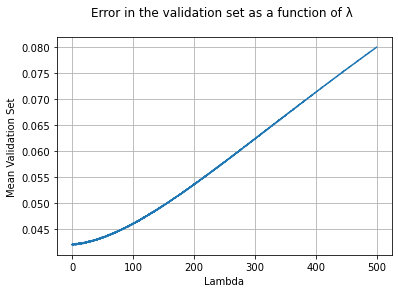

In [21]:

plt.xlabel('Lambda')
plt.ylabel('Mean Validation Set')
plt.plot(lambdas, loss)
plt.title('Error in the validation set as a function of λ \n')
plt.grid()
# visualizing plot using matplotlib.pyplot library
plt.show()

In [22]:
print("Mean Squared Error on train set using w_ridge ",(1/n_train)*(LA.norm(X_train@w_ridge - y_train))**2)

Mean Squared Error on train set using w_ridge  0.031430839925003076


In [23]:
# import Excel A2Q1 data:
df_test = pd.read_csv("A2Q2Data_test.csv",header = None)
df_test

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,0.21302,0.446210,0.51432,0.219750,0.495440,0.463670,0.26007,0.28137,0.983820,0.00777,...,0.92910,0.286690,0.45841,0.788740,0.041794,0.58736,0.904910,0.91718,0.68321,2.0121
1,0.32563,0.703990,0.31970,0.045240,0.869680,0.131360,0.47664,0.26632,0.334520,0.81200,...,0.51868,0.255460,0.29498,0.008869,0.169970,0.92325,0.421340,0.90906,0.61539,1.8164
2,0.49539,0.623570,0.58121,0.879160,0.930960,0.203040,0.35752,0.31232,0.066225,0.46389,...,0.85782,0.505300,0.32361,0.693090,0.690430,0.01604,0.467410,0.67303,0.60459,1.6435
3,0.88875,0.013187,0.87982,0.858160,0.793920,0.792390,0.76522,0.85145,0.233610,0.57924,...,0.25535,0.383410,0.55130,0.727730,0.676890,0.84605,0.611160,0.58514,0.41724,2.7451
4,0.15178,0.540760,0.26896,0.006752,0.101020,0.342080,0.86855,0.32698,0.285460,0.80503,...,0.54955,0.129320,0.94848,0.326100,0.268010,0.27125,0.535350,0.91872,0.16801,1.8932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.10578,0.870530,0.66376,0.570310,0.691110,0.065131,0.25840,0.56343,0.958840,0.75578,...,0.73314,0.947650,0.41785,0.450240,0.226930,0.12547,0.506790,0.60808,0.61612,2.2680
496,0.36756,0.673490,0.54089,0.932350,0.037031,0.806840,0.50789,0.27116,0.879440,0.57790,...,0.75535,0.067279,0.97832,0.759940,0.991350,0.80861,0.716250,0.43949,0.79699,2.8274
497,0.24582,0.320620,0.79933,0.743320,0.314150,0.713150,0.90045,0.67816,0.392680,0.96917,...,0.59358,0.711090,0.45839,0.434920,0.464740,0.69551,0.447860,0.78741,0.11548,2.8058
498,0.31768,0.937750,0.91269,0.840630,0.301710,0.600530,0.59427,0.10969,0.438170,0.39921,...,0.58933,0.892750,0.70348,0.715340,0.198450,0.31288,0.099705,0.82134,0.71902,2.2495


In [24]:
feature_test  = 0
X_test = df_test.iloc[:,:-1]
Y_test = df_test.iloc[::,-1:]
#iterating through the whole file
for row_test in X_test:
    feature_test = feature_test + 1
f_test = feature_test
n_test = len(df_test)

In [25]:
print(f_test,n_test)
X_test = X_test.to_numpy()
y_test = Y_test.to_numpy()

100 500


In [26]:
print("Mean Squared Error on test set using w_ridge ",(1/n_test)*(LA.norm(X_test@w_ridge - y_test))**2)

Mean Squared Error on test set using w_ridge  0.36587408592522985


In [27]:
print("Mean Squared Error on train set using w_ridge ",(1/n_train)*(LA.norm(X_train@w_ridge - y_train))**2)

Mean Squared Error on train set using w_ridge  0.031430839925003076


## Mean Squared Error on train set using Ridge Regression : 0.36587408592522985

## Mean Squared Error on test set using Ridge Regression : 0.031430839925003076

## Compare the test error (for the test data in the file A2Q2Data test.csv) of wR with wML. Which is better and why?

## Mean Squared Error on test  set using w_ML  : 0.3707273111697899

## Mean Squared Error on test set using Ridge Regression : 0.031430839925003076¶

#### wR looks better for the given data. The Mean Squared error is very low for the wR. 

#### But when we consider the time taken by Ridge Regression, Mean Squared Error using wML seems to give better performance

#### Compare the test error Ridge Regression seems to achieve less Error than the wML